# Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
connection = pg.connect(user="mp_quantri",
                                  password="asdaw@23423das",
                                  host="101.96.116.82",
                                  port="8182",
                                  database="tintuc_haisan")

In [3]:
def load_data(file,c=connection):
    filename='select * from public.'+file
    data = pd.read_sql_query(filename, c)
    #data = pd.read_sql_query('select * from public.bang_tong_hop', connection)
    return data

In [4]:
#1. hungpq_mp_cost_price # cp
#2. hungpq_mp_material_price # mp
#3. hungpq_mp_material_quantity_order # mqo
#4. hungpq_mp_material_quantity_purchase # mqp
#5. hungpq_mp_product_price # pp
#6. hungpq_mp_product_price_ring # ppr

# Save datasets
#for file in files:
#    df=load_data(file,c=connection)
#    df.to_csv(file+'.csv',index=False)
    
files=[
'hungpq_mp_cost_price',
'hungpq_mp_material_price',
'hungpq_mp_material_quantity_order',
'hungpq_mp_material_quantity_purchase',
'hungpq_mp_product_price',
'hungpq_mp_product_price_ring']

In [5]:
datasets={}
for file in files:
    df=load_data(file,c=connection)
    datasets[file]=df

In [6]:
dfp_cost=datasets['hungpq_mp_cost_price']
dfp_material=datasets['hungpq_mp_material_price']
dfp_product=datasets['hungpq_mp_product_price']
dfp_ring=datasets['hungpq_mp_product_price_ring']
dfm_order=datasets['hungpq_mp_material_quantity_order']
dfm_purchase=datasets['hungpq_mp_material_quantity_purchase']


# Price 

In [7]:
#dfp_cost.head(2) # datasets['hungpq_mp_cost_price']
#dfp_cost=dfp_cost[dfp_cost.columns[:10]]
dfp_cost=dfp_cost[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_cost.head(2) #dfp_costs: s tandard_type, standard_size, price (USD/kg), active_date

In [8]:
#dfp_product.head(2)#datasets['hungpq_mp_product_price']
#dfp_product=dfp_product[dfp_product.columns[:12]]
dfp_product=dfp_product[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_product.head(2)# dfp_product: standard_type, standard_size, price (USD/kg), active_date

In [9]:
#dfp_ring.head(2)#datasets['hungpq_mp_product_price_ring']
#dfp_ring=dfp_ring[dfp_ring.columns[:11]]
dfp_ring=dfp_ring[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_ring.head(2)# dfp_ring: standard_type, standard_size, price (USD/Ring),active_date

In [10]:
#dfp_material.head(2)#datasets['hungpq_mp_material_price']
dfp_material=dfp_material[dfp_material.columns[:6]]
#dfp_material.head(2) # standard_type, standard_size, price (1000kVND/kg),factory, active_date
dfp_material_hg=dfp_material[dfp_material['factory']=='Hậu Giang']
dfp_material_cm=dfp_material[dfp_material['factory']=='Cà Mau']
dfp_material_hg=dfp_material_hg[['standard_type', 'standard_size', 'price', 'active_date']]
dfp_material_cm=dfp_material_cm[['standard_type', 'standard_size', 'price', 'active_date']]

In [65]:
#dfp_material_hg.head(2)

In [64]:
#dfp_material_cm.head(2)

### Price: ['standard_type', 'standard_size', 'price', 'active_date']

In [73]:
# Price: ['standard_type', 'standard_size', 'price', 'active_date']
# dfp_cost, dfp_material_hg,dfp_material_cm,# dfp_product,dfp_ring,

#### dfp_cost

In [74]:
#list(dfp_cost['active_date'].unique())

In [11]:
list_type=list(dfp_cost['standard_type'].unique())
list_size=list(dfp_cost['standard_size'].unique())

In [12]:
dfp_cost_type_size=dfp_cost[(dfp_cost['standard_type']==list_type[0])&(dfp_cost['standard_size']==list_size[0])]
dfp_cost_type=dfp_cost[dfp_cost['standard_type']==list_type[0]]

In [16]:
dfp_cost_type_size['active_date'].min()

datetime.date(2018, 6, 8)

In [18]:
start_date =dfp_cost_type_size['active_date'].min()
end_date = dfp_cost_type_size['active_date'].max()

In [19]:
dfp_cost_type_size= dfp_cost_type_size[(dfp_cost_type_size['active_date'] >= start_date) 
                                       & (dfp_cost_type_size['active_date'] < end_date)]

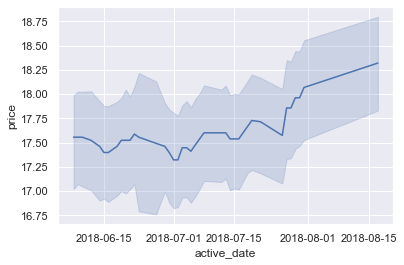

In [20]:
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_cost_type_size)

In [21]:
start_date =dfp_cost_type['active_date'].min()
end_date = dfp_cost_type['active_date'].max()
dfp_cost_type= dfp_cost_type[(dfp_cost_type['active_date'] >= start_date) 
                                       & (dfp_cost_type['active_date'] < end_date)]



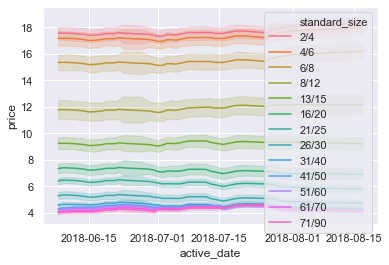

In [26]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_size",data=dfp_cost_type)

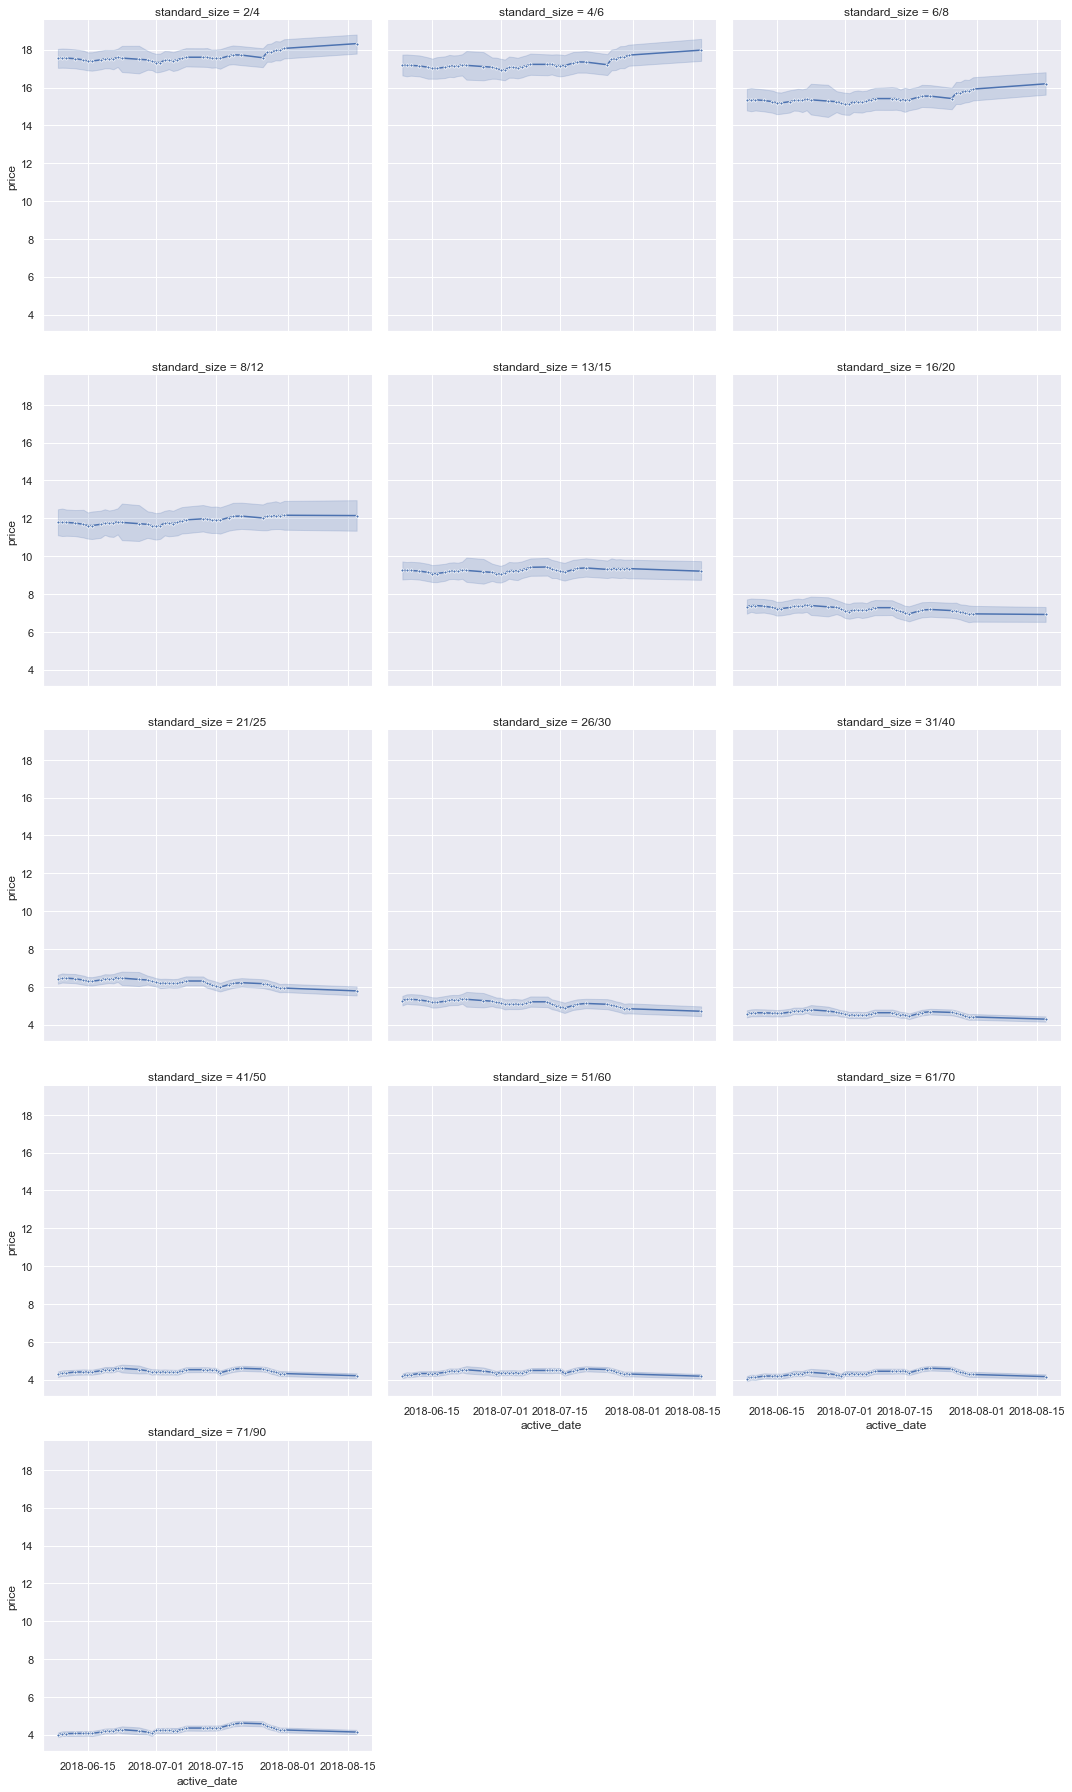

In [24]:
g = sns.FacetGrid(dfp_cost_type, col="standard_size", col_wrap=3, height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

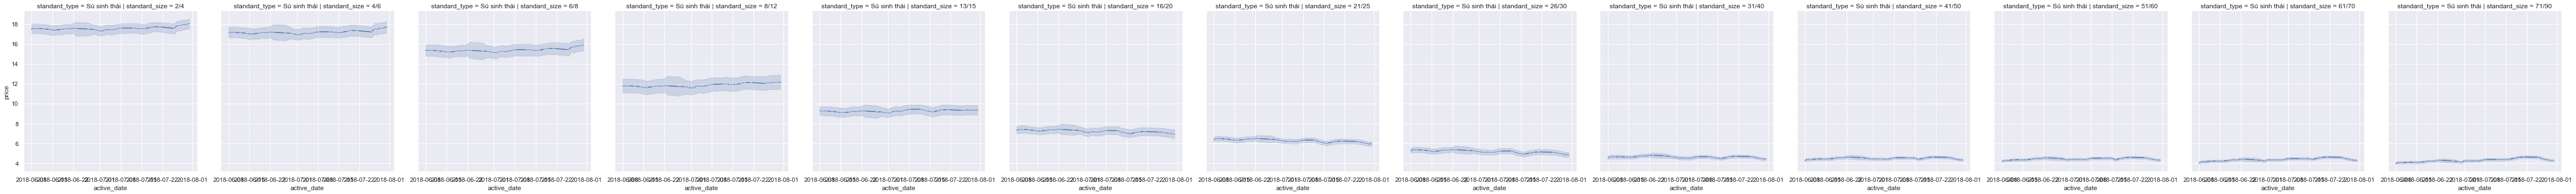

In [42]:
start_date =dfp_cost['active_date'].min()
end_date = dfp_cost['active_date'].max()
dfp_cost= dfp_cost[(dfp_cost['active_date'] >= start_date)  & (dfp_cost['active_date'] < end_date)]

g = sns.FacetGrid(dfp_cost, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

#### dfp_material_hg

In [64]:
#list(dfp_material_hg['active_date'].unique())

In [46]:
start_date =dfp_material_hg['active_date'].min()
end_date = dfp_material_hg['active_date'].max()
dfp_material_hg= dfp_material_hg[(dfp_material_hg['active_date'] >= start_date) 
                                       & (dfp_material_hg['active_date'] < end_date)]

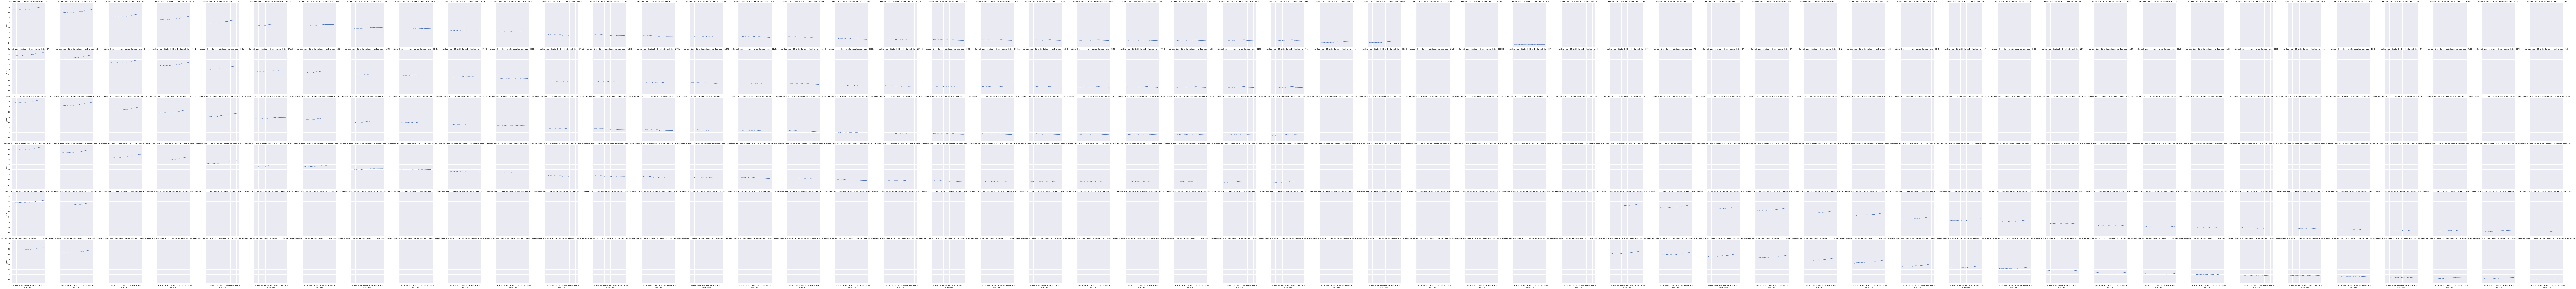

In [47]:
g = sns.FacetGrid(dfp_material_hg, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

In [49]:
list_type=list(dfp_material_hg['standard_type'].unique())
list_size=list(dfp_material_hg['standard_size'].unique())

In [50]:
dfp_material_hg_type_size=dfp_material_hg[(dfp_material_hg['standard_type']==list_type[0])
                                          &(dfp_material_hg['standard_size']==list_size[0])]

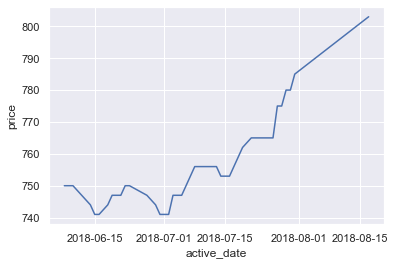

In [51]:
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_material_hg_type_size)

In [52]:
dfp_material_hg_size=dfp_material_hg[(dfp_material_hg['standard_size']==list_size[0])]

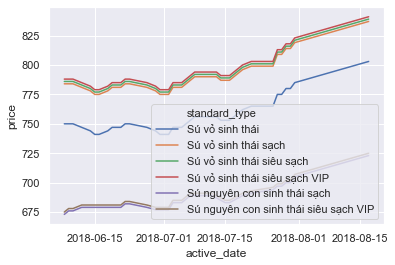

In [58]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_type",data=dfp_material_hg_size)

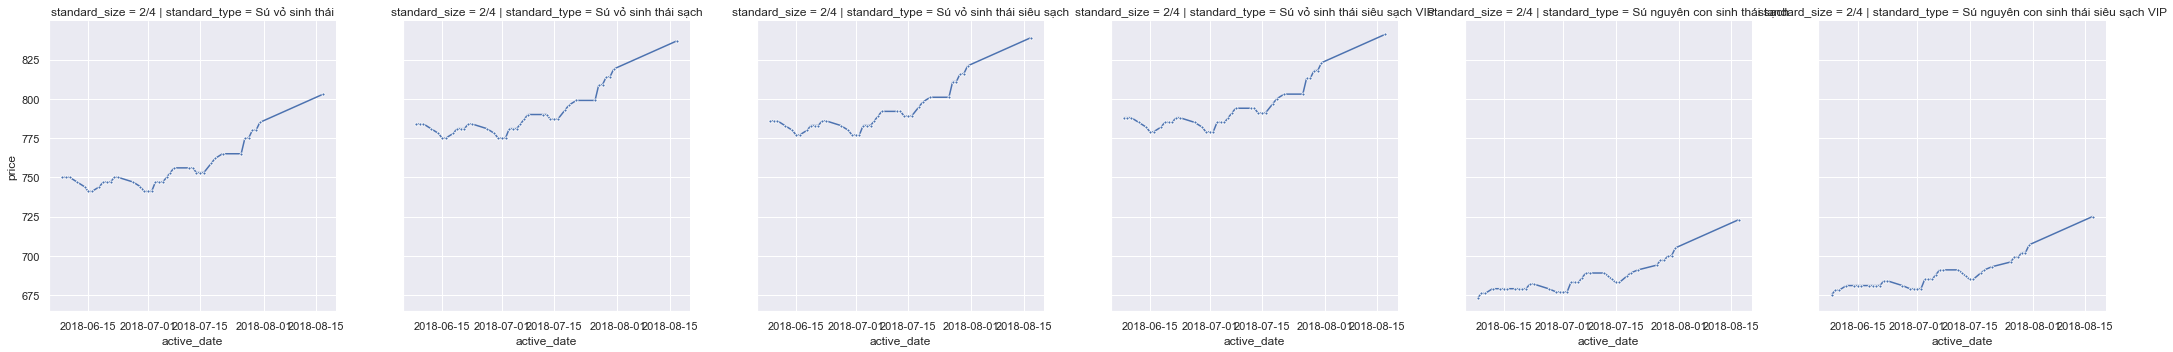

In [60]:
g = sns.FacetGrid(dfp_material_hg_size, row="standard_size",col="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

In [61]:
#### dfp_material_cm

In [63]:
#list(dfp_material_cm['active_date'].unique())

In [65]:
start_date =dfp_material_cm['active_date'].min()
end_date = dfp_material_cm['active_date'].max()
dfp_material_cm= dfp_material_cm[(dfp_material_cm['active_date'] >= start_date) 
                                       & (dfp_material_cm['active_date'] < end_date)]

In [66]:
list_type=list(dfp_material_cm['standard_type'].unique())
list_size=list(dfp_material_cm['standard_size'].unique())

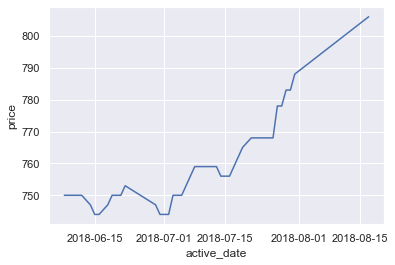

In [67]:
dfp_material_cm_type_size=dfp_material_cm[(dfp_material_cm['standard_type']==list_type[0])
                                          &(dfp_material_cm['standard_size']==list_size[0])]
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_material_cm_type_size)

In [69]:
dfp_material_cm_size=dfp_material_cm[(dfp_material_cm['standard_size']==list_size[0])]

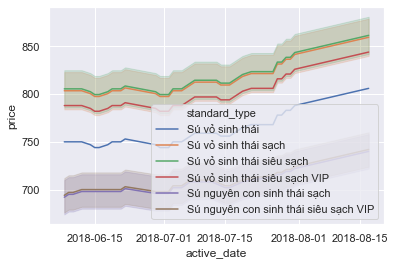

In [70]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_type",data=dfp_material_cm_size)

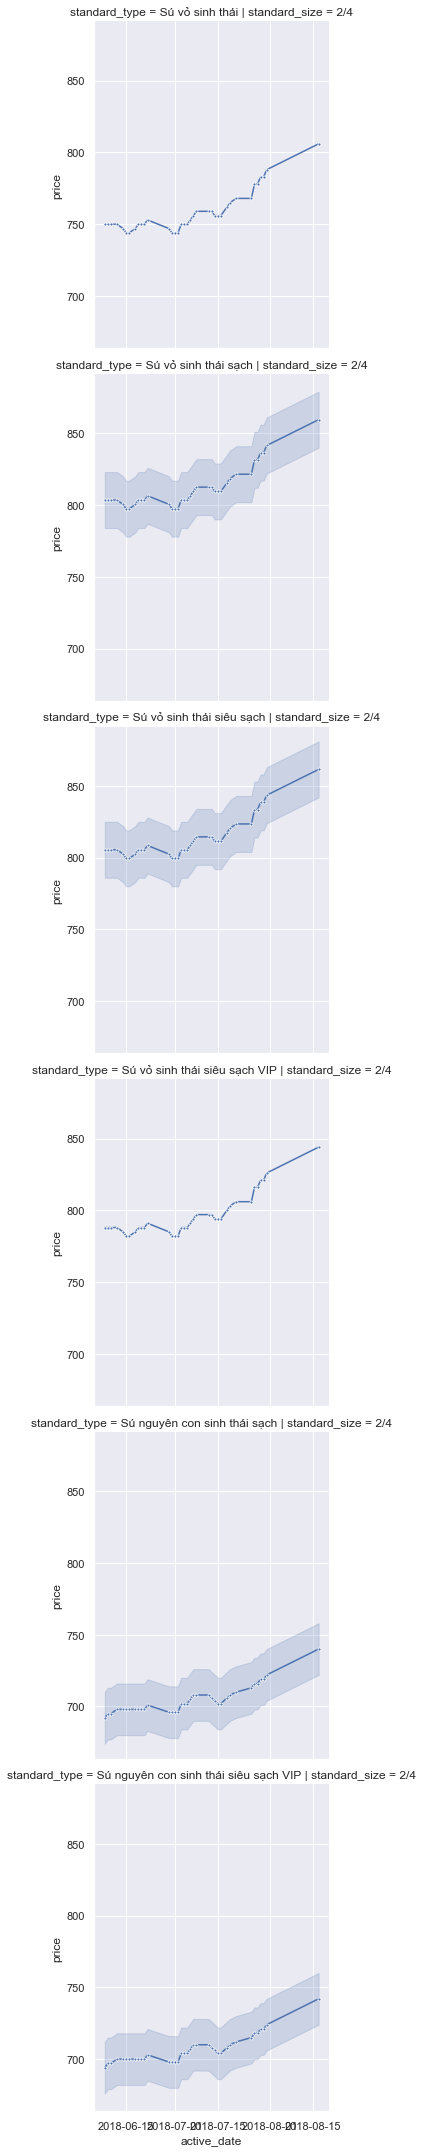

In [72]:
g = sns.FacetGrid(dfp_material_cm_size, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

#### dfp_ring

In [44]:
list(dfp_ring['active_date'].unique()) # one days

[datetime.date(2019, 9, 23)]

#### dfp_product

In [37]:
list(dfp_product['active_date'].unique()) # two days

[datetime.date(2019, 9, 12), datetime.date(2019, 9, 23)]

In [39]:
#g = sns.FacetGrid(dfp_product, row="standard_size",col='standard_type',  height=4)
#g = g.map(sns.lineplot, "active_date", "price", marker=".")

# Material

In [75]:
#dfm_order.head(2)#=datasets['hungpq_mp_material_quantity_order']
dfm_order=dfm_order[dfm_order.columns[:6]]
dfm_order_hg=dfm_order[dfm_order['factory']=='Hậu Giang']
dfm_order_hg=dfm_order_hg[['type','size','quantity','active_date']]
dfm_order_cm=dfm_order[dfm_order['factory']=='Cà Mau']
dfm_order_cm=dfm_order_cm[['type','size','quantity','active_date']]

In [81]:
#dfm_order_hg.head(2)
list(dfm_order_hg['active_date'].unique())# 2019 and 2020
list_type=list(dfm_order_hg['type'].unique()) # 3
list_size=list(dfm_order_hg['size'].unique()) #140

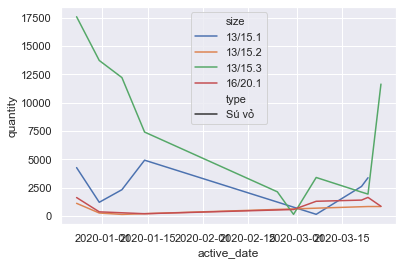

In [91]:
i=5
dfm_order_hg_size=dfm_order_hg[dfm_order_hg['size'].isin(list_size[:4])]
ax = sns.lineplot(x="active_date", y="quantity", hue="size",style="type",data=dfm_order_hg_size)

In [93]:
# dfm_order_cm.head(2)
#list(dfm_order_cm['active_date'].unique())# 2019 and 2020
list_type=list(dfm_order_cm['type'].unique()) # 3
list_size=list(dfm_order_cm['size'].unique()) #140

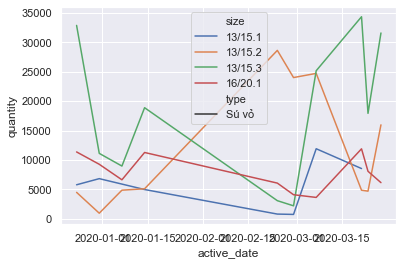

In [94]:
i=5
dfm_order_cm_size=dfm_order_cm[dfm_order_cm['size'].isin(list_size[:4])]
ax = sns.lineplot(x="active_date", y="quantity", hue="size",style="type",data=dfm_order_cm_size)

In [95]:
#dfm_purchase.head(2)#datasets['hungpq_mp_material_quantity_purchase']
dfm_purchase=dfm_purchase[dfm_purchase.columns[:6]]
dfm_purchase_hg=dfm_purchase[dfm_purchase['factory']=='Hậu Giang']
dfm_purchase_hg=dfm_purchase_hg[['type','size','quantity','active_date']]
dfm_purchase_cm=dfm_purchase[dfm_purchase['factory']=='Cà Mau']
dfm_purchase_cm=dfm_purchase_cm[['type','size','quantity','active_date']]
#dfm_purchase.head(2)

In [98]:
#dfm_purchase_hg.head(2)
#list(dfm_purchase_hg['active_date'].unique())# datetime.date(2019, 1, 2), datetime.date(2020, 3, 28)
list_type=list(dfm_purchase_hg['type'].unique())
list_size=list(dfm_purchase_hg['size'].unique())



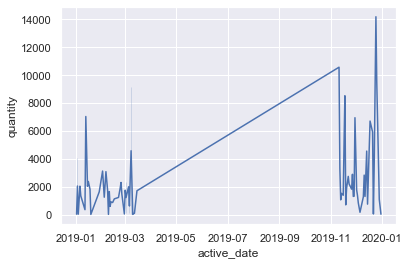

In [117]:
dfm_purchase_hg_size=dfm_purchase_hg[dfm_purchase_hg['size'].isin(list_size[:1])]
ax = sns.lineplot(x="active_date", y="quantity",data=dfm_purchase_hg_size)


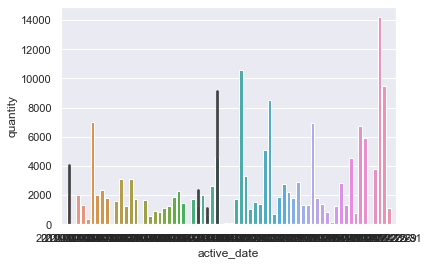

In [116]:
ax = sns.barplot(x="active_date", y="quantity",data=dfm_purchase_hg_size)

In [99]:
#dfm_purchase_cm.head(2)

In [119]:
list_type=list(dfm_purchase_cm['type'].unique())
list_size=list(dfm_purchase_cm['size'].unique())

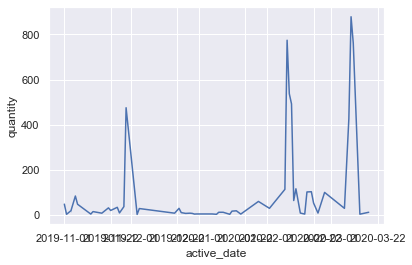

In [120]:
dfm_purchase_cm_size=dfm_purchase_cm[dfm_purchase_cm['size'].isin(list_size[:1])]
ax = sns.lineplot(x="active_date", y="quantity",data=dfm_purchase_cm_size)

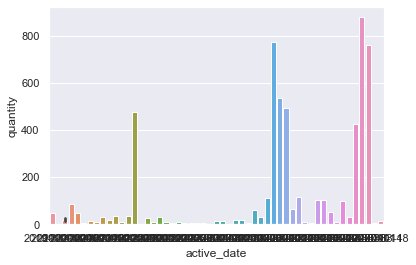

In [121]:
ax = sns.barplot(x="active_date", y="quantity",data=dfm_purchase_cm_size)

In [100]:
# Material # ['type','size','quantity','active_date']
#dfm_order_hg,dfm_order_cm, dfm_purchase_hg,dfm_purchase_cm